# Исследование объявлений о продаже квартир

Представлены данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования -** установить параметры, определяющие рыночную стоимость объектов недвижимости

**Ход исследования**
1. Изучение данных.
2. Предобработка данных.
3. Расчет дополнительных характеристик.
4. Исследовательский анализ данных
5. Подготовка общего вывода.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 колонки, 2 логических, 3 текстовых, 14 десятичных, 3 целочисленных.

Согласно документации к данным:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

В названиях колонок `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` имеются нарушения стиля. Имеются пропуски данных у 14 колонок. 

### Вывод

В каждой строке таблицы - данные о квартире на рынке недвижимости. Колонки описывают характеристики квартиры (площадь, высота потолков, число балконов и др.), объявления (дата публикации, сколько дней было размещено, количество фото и др.) и инфраструктуры (расстояние до аэропорта, центра города, парка). 

Предварительно можно утверждать, что данных достаточно для проведения исследовательского анализа. В данных встречаются пропуски, их необходимо проанализировать и по возможности заполнить.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Стиль колонок

In [5]:
data = data.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest',
        'parks_around3000': 'parks_around_3000',
        'ponds_around3000': 'ponds_around_3000'  
    }
) # переименуем колонки с неправильным стилем

In [6]:
data.columns # проверим колонки

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Обработка пропусков

In [7]:
data.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

* Пропуски в колонках с высотой потолков можно заполнить медианным значением, т.к. у большинства квартир высота стандартная.
* Пропуски общего количества этажей заполним данными из колонки с этажом квартиры. Из-за малого количества пропусков сильного искажения в данные это не внесет.
* Пропуски в колонках с жилой площадью и площадью кухни могли возникнуть из-за того, что их не заполнили. Достоверно заполнить эти пропуски невозможно, поэтому заполним их значением `-999`.
* Пропуски в аппартаментах, наличии балконов могут быть из-за того, что продавец не стал указывать эти пункты, так как их нет. Соответственно, можно присвоить пропускам False и 0. 
* Отсутствуют названия 49 населенных пунктов. Заполнить такие пропуски значением `unknown`.
* Пропуски в расстоянии до объектов инфраструктуры могли возникнуть из-за того, что при автоматичесом получении данных могли возникнуть ошибки, например неверно был считан адрес. Достоверно заполнить эти пропуски невозможно, поэтому заполним их значением `-999`.
* Пропуски в поле с количеством дней достоверно заполнить невозможно, поэтому оставим их пустыми.

**Заполнение пропусков с высотой потолков и общим количеством этажей**

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) # заполняем колонку медианным значением высоты потолков
data['floors_total'] = data['floors_total'].fillna(data['floor']) # заполняем колонку соответствующим значением колонки этаж

**Заполнение пропусков в площадях**

In [9]:
data['living_area'] = data['living_area'].fillna(-999) # заполняем колонку с пропусками жилой площади
data['kitchen_area'] = data['kitchen_area'].fillna(-999) # заполняем колонку с пропусками площади кухни

**Заполнение пропусков в аппартаментах и балконах**

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)

**Заполнение пропусков в населенных пунктах**

In [11]:
data['locality_name'] = data['locality_name'].fillna('unknown') # заполняем все пропуски значением 'unknown'

**Заполнение пропусков в расстояниях**

In [12]:
data['airports_nearest'] = data['airports_nearest'].fillna(-999)
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(-999)
data['parks_around_3000'] = data['parks_around_3000'].fillna(-999)
data['parks_nearest'] = data['parks_nearest'].fillna(-999)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(-999)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-999)

**Заполнение пропусков с количеством дней размещения**

In [13]:
data.isna().sum() # проверяем заполнение

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition         3181
dtype: int64

Пропуски в столбце с количеством дней остались незаполненными, т.к. они являются неслучайными и достоверно заполнить их невозможно.    

### Изменение типов данных

In [14]:
data.dtypes # проверим типы данных 

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3000       float64
parks_nearest           float64
ponds_around_3000       float64
ponds_nearest           float64
days_exposition         float64
dtype: object

* Колонка с датой публикации имеет текстовый тип данных. Необходимо конвертировать её в формат datetime, чтобы в дальнейшем можно было использовать её для вычислений.
* Колонки с ценой, количеством этажей, балконов, парков и прудов имеют вещественный тип данных, который надо заменить на целочисленный, т.к. дробные доли не несут полезной информации в этих колонках.

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # конвертируем в формат datetime
data['first_day_exposition'].head() # проверяем результат

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [16]:
# изменяем тип данных на целочисленный
data['last_price'] = data['last_price'].astype('int') 
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['parks_around_3000'] = data['parks_around_3000'].astype('int')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')

In [17]:
data.dtypes # проверяем результат

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                int64
parks_nearest                  float64
ponds_around_3000                int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

## Расчёт дополнительных характеристик

Посчитаем и добавим в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

**Цена квадратного метра**

In [18]:
data['price_sq_m'] = data['last_price'] / data['total_area'] # расчет цены квадратного метра
data['price_sq_m'] = data['price_sq_m'].astype('int') # изменение типа данных
data['price_sq_m'].head() # проверяем результат

0    120370
1     82920
2     92785
3    408176
4    100000
Name: price_sq_m, dtype: int64

**День недели, месяц и год публикации объявления**

In [19]:
data['weekday_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday # создаем колонку с днем недели
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month # создаем колонку с месяцем
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year # создаем колонку с годом
data.head() # проверяем результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_m,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,-999.0,0,-999.0,81.0,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,-999.0,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018


**Этаж квартиры**

In [20]:
def floor_check(row): # создаем функцию, проверяющую, является ли этаж последним, первым, или другим 
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == floors_total:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'

data['floor_position'] = data.apply(floor_check, axis=1) # применяем функцию к датафрейму, создаем новую колонку
data.head() # проверяем результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_m,weekday_exposition,month_exposition,year_exposition,floor_position
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,NaN,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,-999.0,0,-999.0,81.0,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558.0,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,-999.0,9,False,...,2,84.0,3,234.0,424.0,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,100000,1,6,2018,другой


**Соотношение площадей**

In [21]:
data['living_to_total_ratio'] = data['living_area'] / data['total_area'] # вычисляем отношение жилой и общей площади
data['kitchen_to_total_ratio'] = data['kitchen_area'] / data['total_area'] # вычисляем отношение площади кухни к общей
data.head() # проверяем результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_sq_m,weekday_exposition,month_exposition,year_exposition,floor_position,living_to_total_ratio,kitchen_to_total_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,-999.0,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,-999.0,9,False,...,3,234.0,424.0,408176,4,7,2015,другой,-6.283019,-6.283019
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

### Изучение параметров

**Общая площадь**

In [22]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

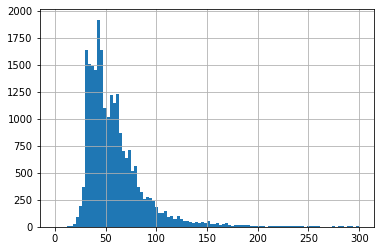

In [23]:
data['total_area'].hist(bins=100, range=(0, 300))

В среднем, площадь квартиры составляет около 50 кв. м. Максимальное значение 900 можно отнести к выбросам. По гисторамме видно, что после 300 значения практически не встречаются, так что при анализе можно использовать 300 как верхнюю границу.

**Цена**

In [24]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

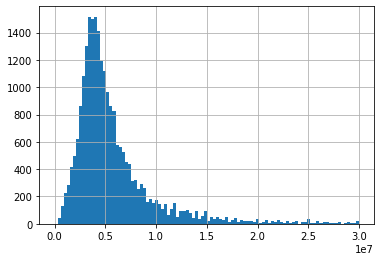

In [25]:
data['last_price'].hist(bins=100, range=(10000, 30000000))

Средняя цена составляет около 5 млн рублей. В качестве верхней границы возьмём 30 млн руб.

**Количество комнат**

In [26]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

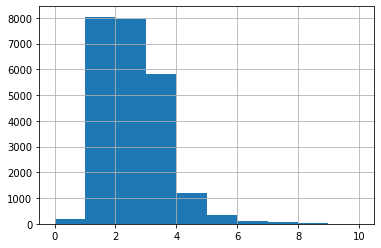

In [27]:
data['rooms'].hist(bins=10, range=(0, 10))

In [28]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

По гистограмме можно сказать, что больше всего продается однокомнатных квартир. Однако рассчитанным средним и медианным являются двухкомнатные квартиры, которых немного меньше. В качестве верхней границы можно принять 10 комнат.

**Высота потолков**

In [29]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

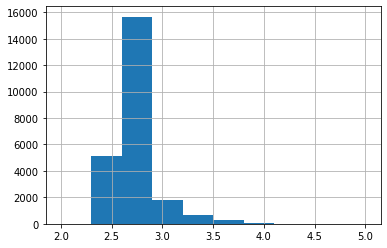

In [30]:
data['ceiling_height'].hist(bins=10,  range=(2, 5))

Средняя высота потолков - 2,7 м, стандартный размер. Меньше 2 и больше 5 м потолков не бывает, возьмем эти величины в качестве границ.

### Изучение времени продажи квартиры

In [31]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

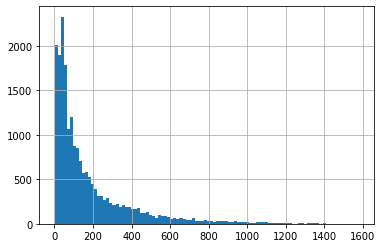

In [32]:
data['days_exposition'].hist(bins=100)

<AxesSubplot:>

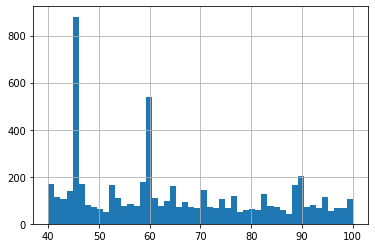

In [33]:
data['days_exposition'].hist(bins=50,  range=(40, 100))

Среднее время продажи составляет 180 дней, при этом медианное время в два раза меньше - 95 дней. Такое сильное различие можно объяснить наличием относительно небольшого количества очень долгих продаж. Продажу можно считать быстрой, если она заняла меньше 45 дней. Необычайно долгими являются продажи, занимающие больше 300 дней. 

В начале графика имеются крупные выбросы в данных на значениях 45, 60 и 90 дней (показаны на второй гистограмме). Наличие выбросов, да ещё и у таких круглых значений довольно странно. Возможно, система настроена так, что объявления автоматически закрываются по прошествии определенного количества дней. Либо при расчете количества дней произошла ошибка.    

### Редкие и выбивающиеся значения

На основе полученных на предыдущих этапах границ, создадим срез данных `good_data`. 

In [34]:
good_data = data.query('total_area < 300 and rooms < 10 and 2 < ceiling_height < 5 and last_price < 30000000')
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23311 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23311 non-null  int64         
 1   last_price              23311 non-null  int64         
 2   total_area              23311 non-null  float64       
 3   first_day_exposition    23311 non-null  datetime64[ns]
 4   rooms                   23311 non-null  int64         
 5   ceiling_height          23311 non-null  float64       
 6   floors_total            23311 non-null  int64         
 7   living_area             23311 non-null  float64       
 8   floor                   23311 non-null  int64         
 9   is_apartment            23311 non-null  bool          
 10  studio                  23311 non-null  bool          
 11  open_plan               23311 non-null  bool          
 12  kitchen_area            23311 non-null  float6

**Выводы**

Изначальный набор данных был сокращен в срезе на 387 строк. Были исключены объявления с площадью больше 300 м, количеством комнат более 10, высотой потолков менее 2 м и более 5 м и ценой продажи более 30 млн. Таким образом, мы избавились от большинства выбросов в данных, которые были обусловлены либо ошибками, либо необычными объявлениями.

### Влияние различных факторов на стоимость квартиры

**Зависимость цены от площади**

'Корреляция составляет 0.79'

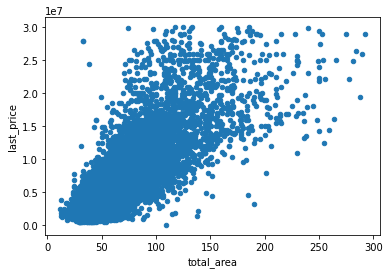

In [35]:
good_data.sort_values('total_area').plot(x='total_area', y='last_price', kind='scatter')
area_corr = good_data['total_area'].corr(good_data['last_price'])
f'Корреляция составляет {area_corr:.2f}'

Можно утверждать, что площадь квартиры напрямую влияет на цену, с коэффициентом корреляции 0,79.

**Зависимость цены от количества комнат**

'Корреляция составляет 0.52'

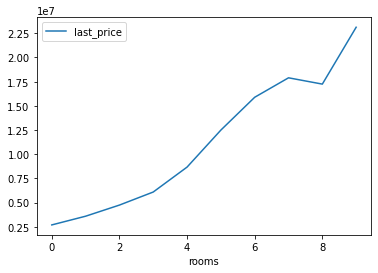

In [36]:
good_data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot()
rooms_corr = good_data['rooms'].corr(good_data['last_price'])
f'Корреляция составляет {rooms_corr:.2f}'

График показывает рост медианной цены при увеличении количества комнат, однако коэффициент корреляции не высокий (0,52)  

**Зависимость цены от близости к центру**

'Корреляция составляет -0.35'

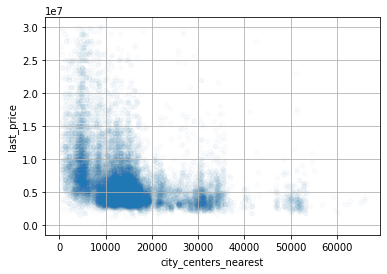

In [37]:
# уберем значения менее 0, т.к. это пропуски и построим график
(
good_data.query('city_centers_nearest > 0')
.sort_values('city_centers_nearest')
.plot(x='city_centers_nearest', y='last_price', kind='scatter', alpha=0.02, grid=True)
)
# рассчитаем корреляцию, отбросив пропущенные значения
centers_corr = good_data.query('city_centers_nearest > 0')['city_centers_nearest'].corr(good_data['last_price'])
f'Корреляция составляет {centers_corr:.2f}'

На графике видно небольшое смещение вниз цены квартиры при удалении от центра. Коэффициент корреляции отрицательный (-0,35), что также говорит о снижении цен с увеличением расстояний. 

**Зависимость цены от этажа**

<AxesSubplot:xlabel='floor_position'>

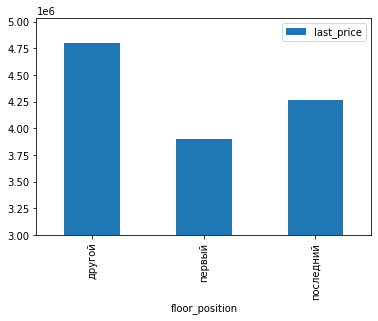

In [38]:
good_data.pivot_table(index='floor_position', values='last_price', aggfunc='median').plot(kind='bar', ylim=(3000000))

Самые дешевые квартиры на первом и последнем этаже, самые дорогие квартиры - между ними.

**Зависимость цены от дня недели публикации объявдения**

<AxesSubplot:xlabel='weekday_exposition'>

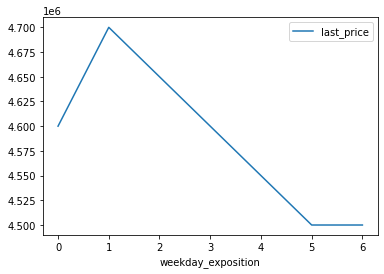

In [39]:
good_data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot()

Квартиры выставляемые на выходных немного дешевле, чем в остальные дни.

**Зависимость цены от месяца публикации объявдения**

<AxesSubplot:xlabel='month_exposition'>

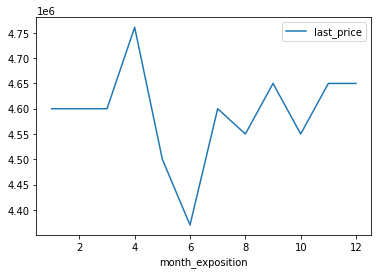

In [40]:
good_data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot()

Квартиры выставляемые в июне дешевле, чем в остальные месяцы.

**Зависимость цены от года публикации объявления**

'Корреляция составляет -0.04'

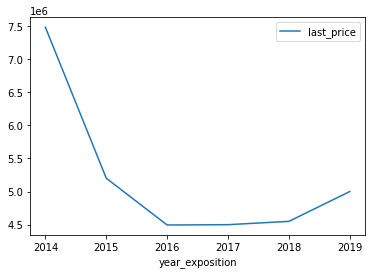

In [41]:
good_data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot()
year_corr = good_data['year_exposition'].corr(good_data['last_price'])
f'Корреляция составляет {year_corr:.2f}'

График показывает резкое падение цен в 2015 году, при этом коэффициент корреляции не показывает наличие зависимости.

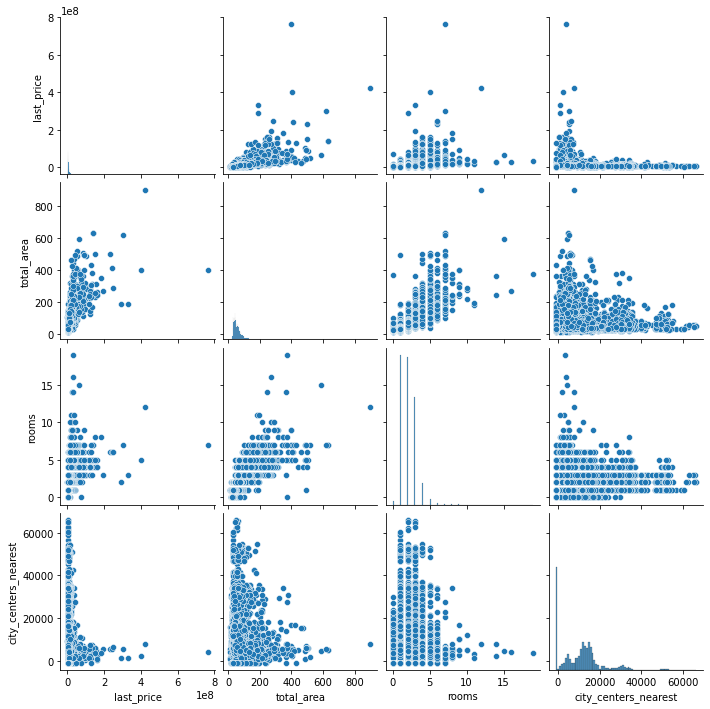

In [42]:
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']]) # построим матрицу графиков для сравнения

**Выводы**

На цену квартиры наиболее сильно влияет общая площадь, меньше - количество комнат и близость к центру города. Также незначительное влияние оказывают этаж и день/месяц обявления. Выявлены интересные особенности - квартиры на первом и последнем этаже дешевле, чем на других. Квартиры выставляемые по выходным, а также в июне дешевле, чем в другие даты. После 2014 года произошло резкое падение цен, практически в два раза. Обнаружена аномалия, проявляющаяся в виде большого количества продаж на 45, 60 и 90 день после публикации. Высказано предположение о том, что объявления автоматически закрываются по прошествии определенного количества дней.

###  Населённые пункты с наибольшим числом объявлений

In [43]:
top_10_ads = data['locality_name'].value_counts().head(10) # считаем количество объявлений для каждого города и берем первые 10 (данные отсортированы по убыванию)
(
data.query('locality_name in @top_10_ads.index') # делаем срез по индексам из топ-10
.pivot_table(index='locality_name', values='price_sq_m') # строим сводную таблицу
.sort_values(by='price_sq_m', ascending=False) # сортируем по убыванию 
)

,price_sq_m
locality_name,
Санкт-Петербург,114848.565231
Пушкин,103125.373984
деревня Кудрово,92473.086957
посёлок Парголово,90175.489297
посёлок Мурино,85751.733716
посёлок Шушары,78676.904545
Колпино,75424.150888
Гатчина,68745.693811
Всеволожск,68654.007538


Самая высокая цена за квадратный метр в Санкт-Петербурге, самая низкая - в Выборге.

### Квартиры в Санкт-Петербурге - расстояние до центра

In [44]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000 # создаем колонку с километрами
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_sq_m,weekday_exposition,month_exposition,year_exposition,floor_position,living_to_total_ratio,kitchen_to_total_ratio,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,-999.0,81.0,82920,1,12,2018,первый,0.460396,0.272277,18
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,-999.0,9,False,...,234.0,424.0,408176,4,7,2015,другой,-6.283019,-6.283019,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000,8


<AxesSubplot:xlabel='city_centers_nearest_km'>

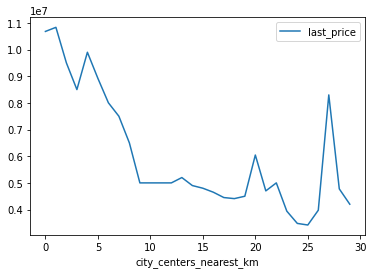

In [45]:
spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_data.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='median').plot()

Центром можно считать удаленность менее 10 км

### Квартиры в центре Санкт-Петербурга

In [46]:
spb_center_data = data.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km < 10') # создаем срез с квартирами в центре
spb_center_data = spb_center_data.query('total_area < 300 and rooms < 10 and 2 < ceiling_height < 5 and last_price < 30000000')
# уберем редкие и выбивающиеся значения
spb_center_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4807 entries, 4 to 23694
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             4807 non-null   int64         
 1   last_price               4807 non-null   int64         
 2   total_area               4807 non-null   float64       
 3   first_day_exposition     4807 non-null   datetime64[ns]
 4   rooms                    4807 non-null   int64         
 5   ceiling_height           4807 non-null   float64       
 6   floors_total             4807 non-null   int64         
 7   living_area              4807 non-null   float64       
 8   floor                    4807 non-null   int64         
 9   is_apartment             4807 non-null   bool          
 10  studio                   4807 non-null   bool          
 11  open_plan                4807 non-null   bool          
 12  kitchen_area             4807 non

**Изучение параметров**

**Общая площадь**

<AxesSubplot:>

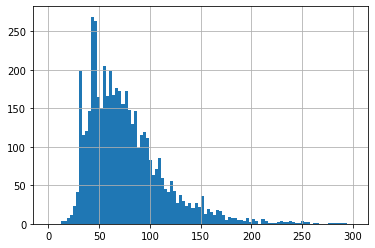

In [47]:
spb_center_data['total_area'].hist(bins=100, range=(0, 300))

Медианное значение площади совпадает с общими данными, однако выше доля квартир большой площади - более 50 м.

**Цена**

<AxesSubplot:>

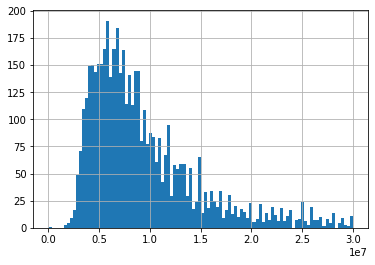

In [48]:
spb_center_data['last_price'].hist(bins=100, range=(10000, 30000000))

Медианное значение выше чем в общих данных, цены в центре выше на 2-3 млн.

**Количество комнат**

<AxesSubplot:>

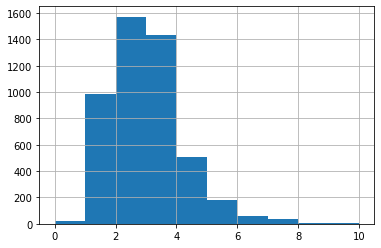

In [49]:
spb_center_data['rooms'].hist(bins=10, range=(0, 10))

Относительное число двух- и трехкомнатных квартир в центре выше, чем в общих данных.

**Высота потолков**

<AxesSubplot:>

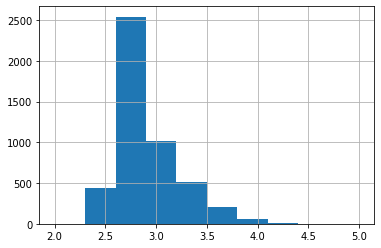

In [50]:
spb_center_data['ceiling_height'].hist(bins=10,  range=(2, 5))

В центре выше доля квартир с высокими потолками (более 3 м).

**Влияние различных факторов на стоимость квартиры**

Постоим графики, аналогичные построенным ранее, для общих данных. Сравним полученные новые графики со старыми.

<AxesSubplot:xlabel='year_exposition'>

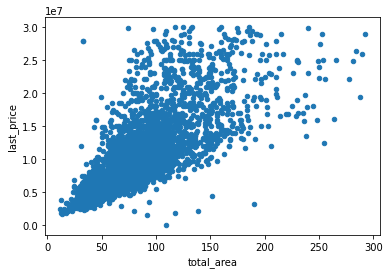

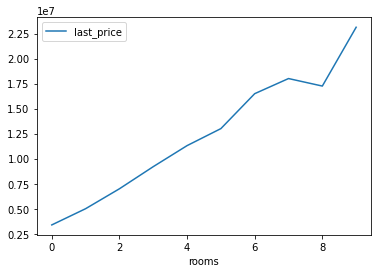

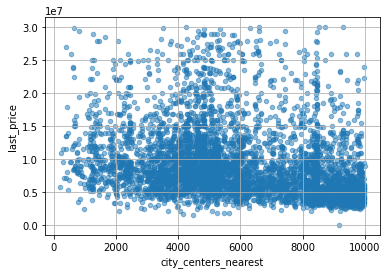

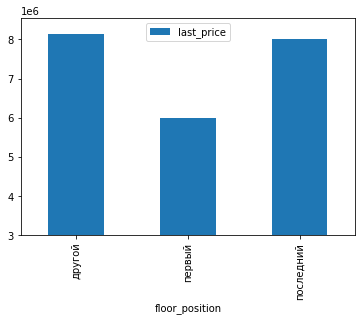

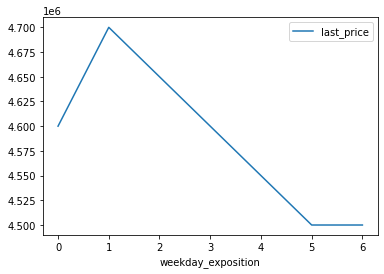

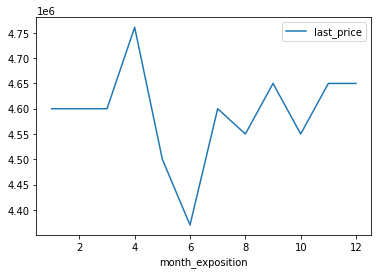

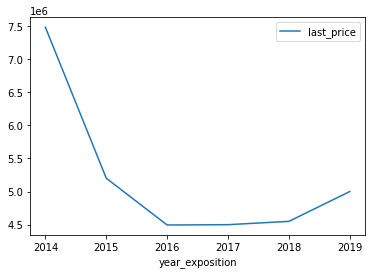

In [51]:
spb_center_data.sort_values('total_area').plot(x='total_area', y='last_price', kind='scatter')
spb_center_data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot()
(
spb_center_data.query('city_centers_nearest > 0')
.sort_values('city_centers_nearest')
.plot(x='city_centers_nearest', y='last_price', kind='scatter', alpha=0.5, grid=True)
)
spb_center_data.pivot_table(index='floor_position', values='last_price', aggfunc='median').plot(kind='bar', ylim=(3000000))
good_data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot()
good_data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot()
good_data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot()

**Выводы**

В центре продаются квартиры большей площади, с большим количеством комнат и с более высокими потолками, чем в общих данных. Соответственно, выше и цены на такое жилье. Влияние различных параметров на цену сопоставимо - на цену квартиры влияет общая площадь, количество комнат, близость к центру города.

## Общий вывод

Проведено исследование объявлений о продаже квартир. Изучены исходные данные, проведена их предобработка - заполнены пропуски, изменены типы данных в колонках. Рассчитаны дополнительные характеристики, на основе иимеющихся. Проведен исследовательский анализ. Изучены основные параметры, оказывающие влияние на цену квартиры. Из выборки были исключены выбросы - выбивающиеся и редкие значения. 

1. Было выявлено, что набольшее влияние на цену квартиры оказывают:

* общая площадь;
* количество комнат;
* близость к центру города.

2. Составлен топ-10 из населенных пунктов с наибольшим количеством объявлений, где места рсапределены по стоимости квадратного метра. Самая высокая цена за квадратный метр в Санкт-Петербурге, самая низкая - в Выборге.

3. Создан набор данных, включающий квартиры из Санкт-Петербурга. Проанализировано распределение цены квартир в зависимости от удаленности от центра. Выявлено, что условным центром можно считать радиус в 10 км - за этим радиусом близость к центру уже не оказывает сильного влияния на цену квартир.

4. Создан набор данных, включающий только квартиры в центре Санкт-Петербурга. Изучены основные параметры, оказывающие влияние на цену квартиры. Выявлено, что в центре Санкт-Петербурга продаются квартиры большей площади, с большим количеством комнат и с более высокими потолками, чем в общих данных. Соответственно, выше и цены на такое жилье. Проанализировано влияние различных параметров на цену жилья. Изменений по сравнению с общими данными не выявлено.

